## Load necessary modules

In [ ]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = str(1)

# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
#from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

# use this to change which GPU to use
#gpu = 1

# set the modified tf session as backend in keras
#setup_gpu(gpu)

from keras_retinanet import models

# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('keras_retinanet', 'snapshots', 'resnet50_pascal_50.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

model = models.convert_model(model)

Using TensorFlow backend.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.




## Load RetinaNet model

In [ ]:
# load label to names mapping for visualization purposes
labels_to_names = {0: 'crowd', 1: 'civilian', 2: 'soldier', 3: 'civil vehicle', 4: 'military vehicle'}

## Load images

In [4]:
import os, cv2
import numpy as np
images = []
X_data = []
y_data = []
for filename in os.listdir("/caa/Homes01/mburges/CVSP-Object-Detection-Historical-Videos/images_and_gt/images/"):
    img = None
    if filename.endswith('.jpg'):

        # Open the file:
        img = cv2.imread(os.path.join("/caa/Homes01/mburges/CVSP-Object-Detection-Historical-Videos/images_and_gt/images/",filename))
    if img is not None:
        txt = np.loadtxt(os.path.join("/caa/Homes01/mburges/CVSP-Object-Detection-Historical-Videos/images_and_gt/groundtruth/",(filename[:-4]+".txt")))
        X_data.append(img)
        y_data.append(txt)
        #images.append(img)
        
image_array = np.array(X_data)
txt_array = np.array(y_data)      
print(image_array.shape)
print(image_array.shape)

(1623, 1080, 1440, 3)
(1623, 1080, 1440, 3)


# Precision Recall CUrve

In [1]:
from sklearn.metrics import classification_report

history = model.fit(x_train, y_train, batch_size=32, epochs=10, verbose=1, validation_data=(x_test, y_test), shuffle=True)
pred = model.predict(x_test, batch_size=32, verbose=1)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted)
print(report)

NameError: name 'model' is not defined

## Run detection on example

processing time:  0.05788755416870117
[522.93976 524.7595  638.2668  932.49817] 1 0.9999995
[680.90497 481.75275 813.92535 920.70825] 1 0.9999987
[ 170.03961  426.87234  380.91663 1007.07935] 1 0.9999951


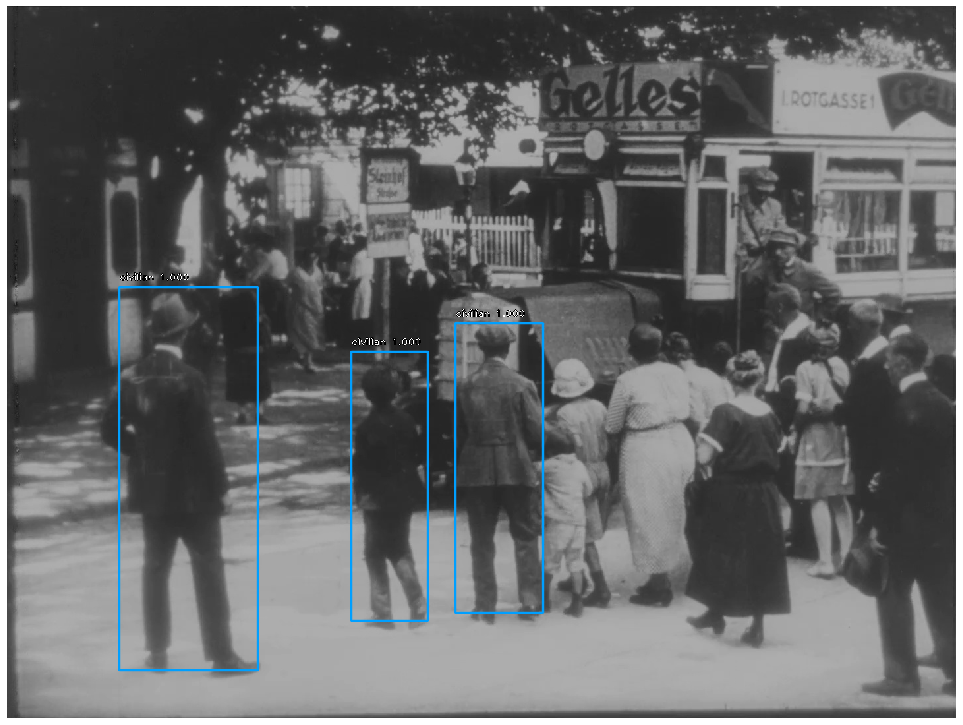

In [7]:
# load image
image = images.pop()

# copy to draw on
draw = image.copy()
draw_regression = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
result = model.predict_on_batch(np.expand_dims(image, axis=0))
boxes, scores, labels = result
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
    
    print (box, label, score)
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
cv2.imwrite("result.png", draw) 
plt.figure(figsize=(17, 17))
plt.axis('off')
plt.imshow(draw)
plt.savefig('/caa/Homes01/mburges/CVSP-Object-Detection-Historical-Videos/result.png')
plt.show()